Name

Labpartner(s)

# Class 13.1 (And 13.2? Let's see how long this takes...)

#### Announcements

- Reminder **no labs will be accepted after 4/18.** After this you all will be working on your final projects. Please review the syllabus on BB for grading policies. 
- For the next two weeks we will have virtual workdays from 2-4PM, and you will submit your programming and a weekly project planning and assessment form.
- If there is a topic you all are excited about for Wed, let me know


# Warmups 13.1

Standard error (SE), aslo called root mean squre error (RMSE), is a measure of how "off" the model is from the data, and is calculated as the squared sum of the difference between the model and the data, divided by the number of data points, then the squre root is taken:

###   SE = $ \sqrt{\frac {\Sigma ( y_{data}-y_{model} )^2}{N}} $

where $y_{data}$ is the data to be fit by a model, $y_{model}$ is the model prediction, N is the number of data points. $\Sigma$ denotes a sum over all the data points. See https://onlinestatbook.com/2/regression/accuracy.html for more info

**W.1** Revisit the linear fit for the Boston housing data set (Lab 10.2), where you did the linear model of housing price vs. number of rooms and also lower status of the population. Compare and contrast the correlation, p values, and standard error for these two linear models. How does the standard error inform your decition as to which variable is a better predictor of housing value? 


Housing Price vs # of rooms:
    
    correlation: 0.6953
    p-value:2.48e-74
    standard error: 0.419
    
Housing Price vs LSTAT:

    correlation:-0.737
    p-value: 5.08e-88
    standard error:.0387

Both, housing price vs rooms and housing price vs LSTAT had similar correlation values, which were around 0.7, although housing price vs LSTAT was slightly higher with a value of 0.737. 

The p-values for both models were less than 0.05, indicating they both were accurate models. 

Housing price vs LSTAT had a slightly lower standard error (.0387) than the housing price vs rooms (0.419). 

Since housing price vs LSTAT had a slightly lower standard error and a slightly higher correlation value, this would be the best model to use. 

**W.2** Using the statsmodels package, add a second variable to your model, so that you are fitting the equation:

$ MEDV = a*RM + b*LSTAT +c$


In [2]:
import pandas as pd 
from scipy import stats
from statsmodels.formula.api import ols # import statsmodel
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library

In [3]:
df = pd.DataFrame(data.data, columns =data.feature_names)
target = pd.DataFrame(data.target, columns = ["MEDV"])

In [4]:
df2 = df
df2['MEDV'] = target.MEDV
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
model = ols("MEDV ~ RM + LSTAT", df2).fit()

In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 15 Apr 2021   Prob (F-statistic):          7.01e-112
Time:                        23:15:30   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

In [7]:
from scipy import stats
from sklearn import linear_model 
import statsmodels.api as sm 

In [150]:
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [151]:
X = df2[["RM","LSTAT"]]
Y = df2["MEDV"]

In [152]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [153]:
#prediction with sklearn 
X = sm.add_constant(X)

In [155]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [156]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          7.01e-112
Time:                        03:38:02   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
housevalue = (5.0948*df2["RM"])+(-0.6424*df2["LSTAT"])-1.3583
df2["LSTAT"]

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

**W.3** Is this a more predictive model of housing value? Explain.



**W.4** What are the values of a and b? What do they mean in this context? 

A is the correlation factor of room numbers and housing value (5.0948) and b is the correlation factor of LSTAT and housing value (-0.6424). Both correlation factors indicate the slope 

# Lecture 13.1

## Agenda:
- Machine Learning in Scikit learn

## Introduction

Machine Learning has emerged as an important tool accross the scientific diciplines and in many business applications. The most commonly used package for machine learning is scikit-learn, which we will play around with this week.

There are a number of types of machine learning algorithms, aka "estimators". A useful flowchart:
https://scikit-learn.org/stable/tutorial/machine_learning_map/

These can be divided up into:

1) Regression. This involves finding the best fit parameters for some model, like with did with linear models.

2) Clustering, which groups data by some similarity criterion (e.g., these data points are grass, these are trees, and these are water because of their spectral data differences). See https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

3) Dimensionality reduction, which breaks data, often timesries data, into principle components. For example if we were looking at a temperature timeseries, we might get as components an annual cycle, a daily cycle, and a multi-year cycle corresponding to ENSO (El Nino - Southern Oscillation), etc.

4) Classification. This uses labeled data to make preditions about what will happen in places you don't have data, for example in this area it is expected to see large green birds and not small red birds, and in another area it is expected to see both types. We will focus on this today.

See also: https://scikit-learn.org/stable/tutorial/basic/tutorial.html



## Classification example from scikit-learn
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Here is the whole code below. We are going to break this example down

C:\Users\Pgran\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pgran\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pgran\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


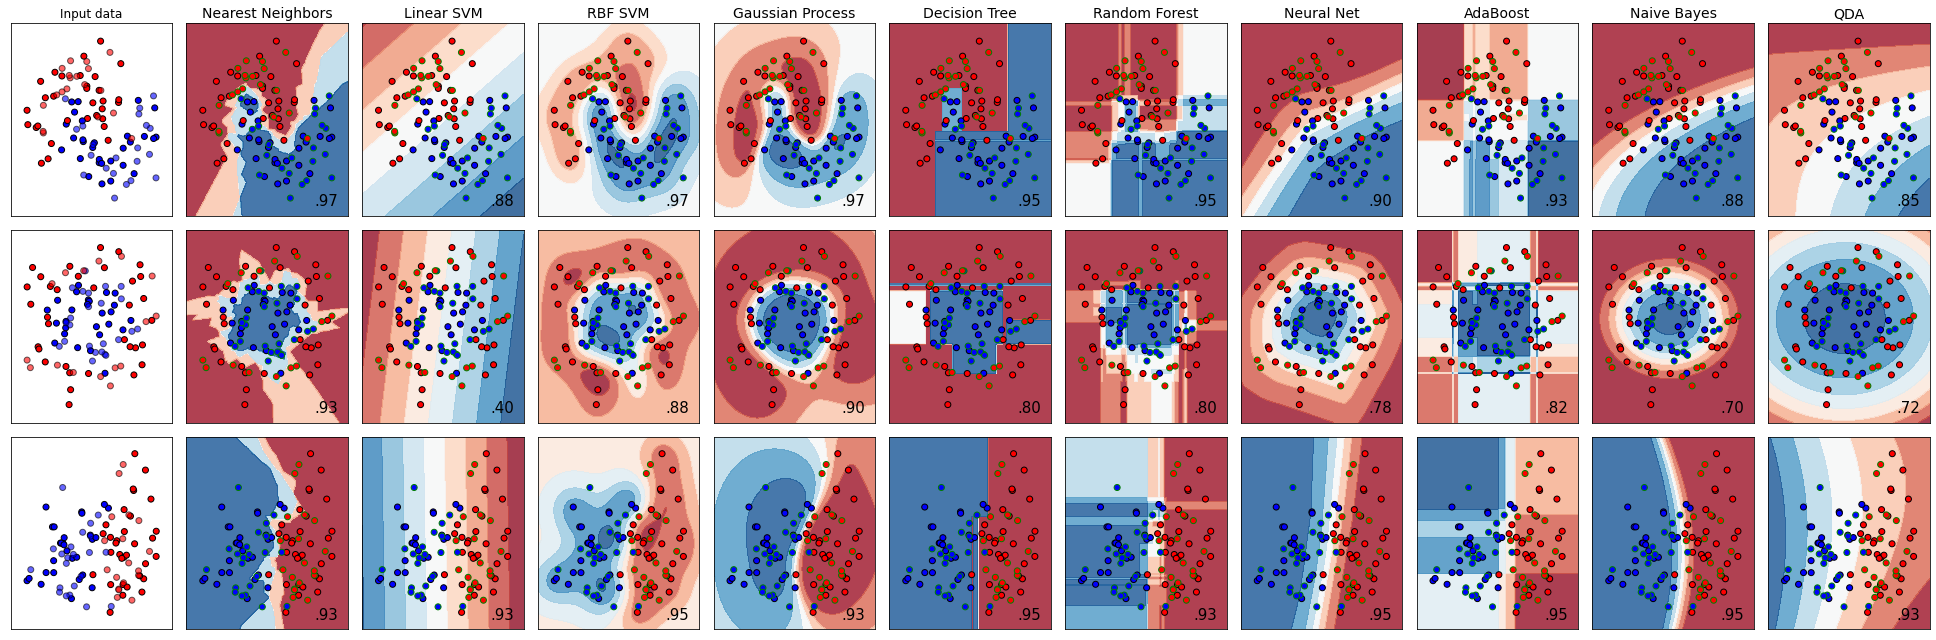

In [12]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

#all sklearn imports are different models 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9), facecolor = 'w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='green', alpha=1, zorder = 10)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize = 14)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

# Step by step

### Load all the packages in

Note they do this for each package separately


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# data and pre-proccessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# all the classifiers we will use:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



In [14]:
h = .02  # step size in the mesh

# create a string list of all the cassifier names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [15]:
# create a function list of all the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

## Part 1: Make some datasets to classify

The example uses three types of data, linearly separable, moons and circles

### Data 1. Linearly separable (side by side data)

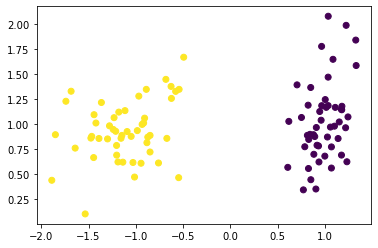

In [16]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0],X[:,1], c= y)

In [17]:
# add some noise to these so they smoosh together - so theyre harder to classify 
X_old = np.copy(X)
#X_old = X
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

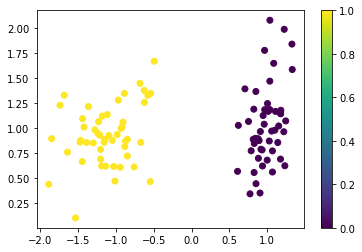

In [18]:
plt.scatter(X_old[:,0],X_old[:,1], c = y)
plt.colorbar()

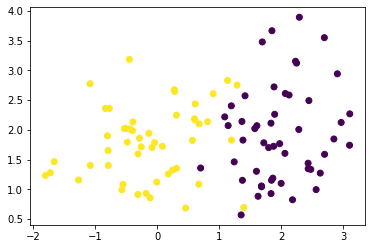

In [19]:
plt.scatter(X[:,0],X[:,1], c = y)

### E1. What happens if you use X_old = X instead of X_old = np.copy(X)?

### Data 2. Moons

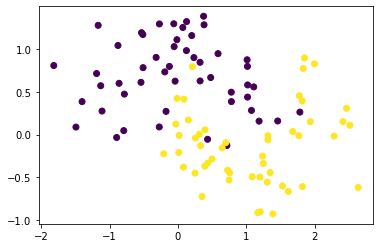

In [20]:
X,y = make_moons(noise=0.3, random_state=10)
plt.scatter(X[:,0],X[:,1], c = y)

### E2. What happens to the make_moons data if you change the noise and random state? Why do you think they picked noise = 0.3?

The more you decrease the noise, the closer it is to the moon shape. Random state just changes where the points are located. 

A noise level pf 0.3 was chosen because it looses the very apparent moon shape, and looks a little scrambled, creating a somewhat random shape. An area whete Purple points are mixed in with yellow points is created at noise 0.3.

### Data 3. Circles

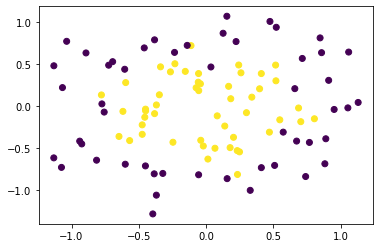

In [21]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

### E3. Play around with the options for make_circles. What does factor do?

With a small factor (such as 0.1), the yellow and purple dots are separated into an inside circle and an outside circle. With a large factor (such as 0.9),both the purple and yellow points make one circle. SO factor describes how far apart the yellow and purple dots are in their circle shape, with small values separating the two points and large values joining them. 

In [23]:
# put the three types of datasets together in one array
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

In [52]:
datasets

[(array([[ 0.03159499,  0.98698776],
         [ 2.11509784, -0.04624397],
         [ 0.88248972, -0.07575606],
         [-0.0551441 , -0.03733246],
         [ 0.82954503, -0.53932149],
         [ 2.11285708,  0.66208353],
         [ 0.5696927 ,  0.33744136],
         [ 0.95217454, -0.75307471],
         [-0.02922115,  0.39287336],
         [ 1.71579557,  0.36069454],
         [-0.27883014,  0.61420539],
         [ 2.00344509, -0.3091496 ],
         [ 1.50009616, -0.74636376],
         [ 1.22540835,  1.19793017],
         [ 0.46730819,  0.54703192],
         [-0.36653222,  1.11971633],
         [ 0.30124459,  1.23315697],
         [ 0.30430746,  0.82373935],
         [-0.23712492,  0.77876034],
         [ 1.16339832,  0.55290238],
         [-0.59702417,  0.6572361 ],
         [ 0.46356735, -0.1951543 ],
         [ 0.68451111,  0.75287685],
         [ 0.70515699, -0.45892444],
         [-0.65805008, -0.12944211],
         [-0.74662946, -0.3829632 ],
         [ 0.60585226,  0.31252842],
 

## Part 2: Big double for loop

The next part of the code has a double for loop that:

    Loops over the datasets
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
    
        Loops over the classifiers
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
        
        
Let's break this down, and start with one dataset and apply a number of classifiers to it

### Using first dataset (moons) and first estimator

#### FIrst we preproccess
preprocess dataset, split into training and test part

scale the data

In [77]:
# get the first dataset, which is moons
X, y = datasets[0]

# scale the data by the mean and standard deviation, i.e. z = (x - u) / s, 
# where x is the data, u is the mean, and s is the standard deviation
# see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = StandardScaler().fit_transform(X)


In [71]:
datasets[0][0][:,0] #moons data -> X data -> column 1 

array([ 0.03159499,  2.11509784,  0.88248972, -0.0551441 ,  0.82954503,
        2.11285708,  0.5696927 ,  0.95217454, -0.02922115,  1.71579557,
       -0.27883014,  2.00344509,  1.50009616,  1.22540835,  0.46730819,
       -0.36653222,  0.30124459,  0.30430746, -0.23712492,  1.16339832,
       -0.59702417,  0.46356735,  0.68451111,  0.70515699, -0.65805008,
       -0.74662946,  0.60585226,  2.18137168,  1.91980633,  1.4834364 ,
        0.47404723,  1.05614605,  1.86500732,  0.4194721 ,  0.06873258,
       -0.17332432,  0.12412421,  0.18121142, -0.25451559,  1.02580668,
        1.52002143,  0.64174037, -0.87615589, -1.06964997,  1.02658765,
        0.93131325,  0.67680544, -0.36885733, -1.02465495,  0.77455385,
        1.4045116 , -0.38147174,  0.72155224, -0.51346686,  0.32118546,
        0.1953628 ,  0.52824196, -0.2216539 ,  0.22334676, -0.10704572,
        0.63651685, -0.37227848,  0.20718083,  0.12733142,  0.71435231,
        1.09487814, -0.14814362,  1.586188  ,  0.74444551,  2.18

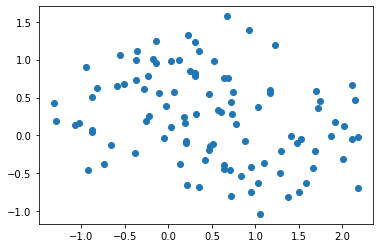

In [72]:
plt.scatter(datasets[0][0][:,0],datasets[0][0][:,1])

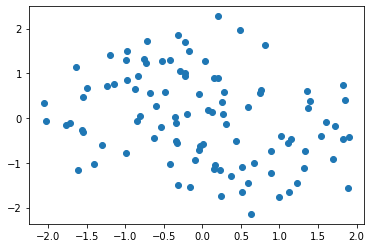

In [79]:
plt.scatter(X[:,0],X[:,1])

### E4 make a plot with two subplots, showing the scaled and unscaled data next to each other. How are they different?

Text(0.5, 1.0, 'Scaled')

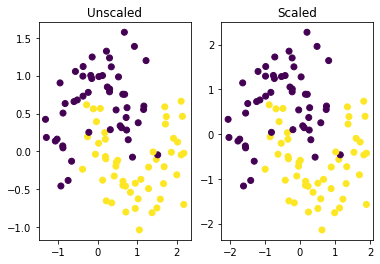

In [95]:
fig, axs = plt.subplots(1,2)

axs[0].scatter(datasets[0][0][:,0],datasets[0][0][:,1], c = y)
axs[0].set_title("Unscaled")
axs[1].scatter(X[:,0],X[:,1], c = y)
axs[1].set_title("Scaled")

The unscaled and scaled data share the same distribution/shape. However, they differ in their scales. The scaled data is more evenly spread since its points fall within the y-range of -2 to 2, while the unscaled data's range stretches from -1 to 1.5. This is difference in the spread of the data is also shown in the x-range as the scaled data ranges from -2 to 2, while the unscaled data ranges from -1 to 2. 

In [84]:
# split the data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)


In [85]:
y_train # color

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [86]:
X_train #position

array([[ 0.30920485, -0.127041  ],
       [-0.48691402,  0.57259859],
       [ 0.50954902, -1.66427178],
       [ 1.35242892,  0.60859541],
       [ 1.89600064, -0.42653506],
       [ 0.74779523,  0.54957438],
       [-1.19805934,  1.40047603],
       [-1.4065875 , -1.03687185],
       [-0.33075371, -0.55325533],
       [ 0.81773837,  1.64300265],
       [-1.30667592, -0.60711187],
       [-0.62663858, -0.45097084],
       [-0.22120141,  1.00868763],
       [-0.85151619, -0.06022663],
       [-0.59739923,  0.27829883],
       [ 0.15581821, -1.14573741],
       [ 0.07813527,  0.18433247],
       [ 0.24130156, -1.74371889],
       [-0.42443599,  1.30854456],
       [ 0.0081454 , -0.58656254],
       [ 0.03138162,  1.27867747],
       [-2.02716273, -0.07552655],
       [-0.20216417,  0.09829492],
       [-1.77093289, -0.15602456],
       [ 1.01975478, -0.39964896],
       [ 1.22467352, -1.45537741],
       [ 0.19895122,  2.27694191],
       [ 0.27524467,  0.58976897],
       [-0.9843448 ,

### E5 What percentage of the data is used for training here?

60 percent was used for training and 40 percent used for testing 

### plot the data

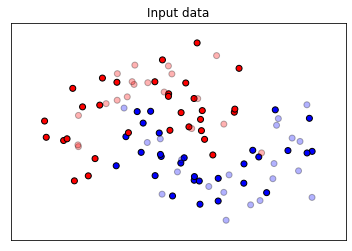

In [87]:
#######
# set up a meshgrid for plotting the classification result based on the size of the dataset
# note this will be used later
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#######

# counter for which subplot we are in
i = 1

# this counter is used to know when to plot the title
ds_cnt = 0

# just plot the dataset first

# note this is not used yet
cm = plt.cm.RdBu

# set the colormap used for the data 
# see https://matplotlib.org/tutorials/colors/colorbar_only.html#sphx-glr-tutorials-colors-colorbar-only-py
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1,1, i)
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# if the first row, plot the title
if ds_cnt == 0:
    ax.set_title("Input data")
    
# Plot the training points using the bright colormap
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
           edgecolors='k')
#alpha is transparency 
#plots testing data points lightly 


# set the limits to the colormap min max we will use later
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# get rid of ticks
ax.set_xticks(())
ax.set_yticks(())

# increment to go to the next subplot
i += 1


Note the testing data is the more transparent set, and the training data is darker

Now we are ready to apply classifiers

Remember we are doing the following:

classifiers = [

    KNeighborsClassifier(3),
    
    SVC(kernel="linear", C=0.025),
    
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    
    DecisionTreeClassifier(max_depth=5),
    
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    
    MLPClassifier(alpha=1),
    
    AdaBoostClassifier(),
    
    GaussianNB(),
    
    QuadraticDiscriminantAnalysis()]

## Nearest neighbors
Basically this method looks at k number of nearest neighbors, using some distance metric, and predicts which class a point is in based on the type of thing those neighbors are.

intro https://www.python-course.eu/k_nearest_neighbor_classifier.php

see https://scikit-learn.org/stable/modules/neighbors.html

and https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

actual help files:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [88]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[0] #choosing name from array of classification methods
clf = classifiers[0]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [92]:
name

'Nearest Neighbors'

In [93]:
clf

# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

KNeighborsClassifier(n_neighbors=3)

In [94]:
score

0.975

Next we will plot the decision boundary using the mesh we generated. Basically this is asking, for each point on the plane, which group would I be in, red or blue?

In [96]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

In [128]:
xx.shape

(272, 248)

In [132]:
xx.ravel().shape

(67456,)

### E6 what does the xx.ravel() bit of code do?

np.ravel turns a multidimensional array into a 1-D array. So this bit of code turns the xx array into a 1_d array

Note that kneighbors does not have a decision_function, so we are using predict_proba. This is the probability that each point in the meshgrid is in either the red class (zeros) or the blue class (ones)

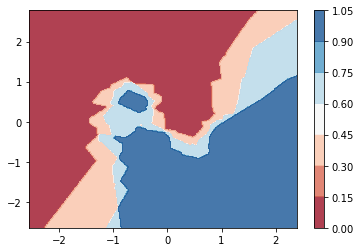

In [97]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

### E7 what do the light blue and peach colors represent?


the light blue and peach colors represent areas where the classifier has a hard time distinguishing whether the are should be blue or red. This is due to the fact that there are blue and red training data points close together or mixed.

Now we will add in the training and testing points, and see how well the method did to predict the latter

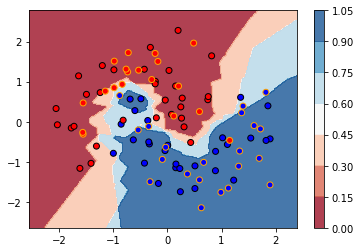

In [133]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

### E8 How well did the method do? Are there outliers in either class? Is it reasonable that this method did not predict those, given the training dataset?

For the most part this method did well. A majority of the red points were placed in red areas, and same with the blue points.  However, there was one outlier as a red testing point was classified as blue. It is odd that it predicted it wrong, as all its neighbors are dark blue. I would have expected that the ones the classifier had trouble classifying would have ended up in the light blue or peach areas. 

### E9 Using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

#### Linear SVM

In [134]:
# index for classifier- Linear SVM
c = 1

name = names[1] #choosing name from array of classification methods
clf = classifiers[1]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [138]:
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

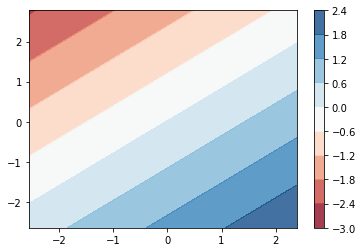

In [139]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

Linear SVM creates a sort of gradient to predict where the points will be. 

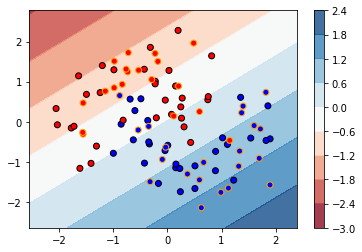

In [140]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

Since this one has much more classifying options/groups, it makes sense that there would be many incorrect classifications. I think this classification method may have favored the blue points. There is still one red outlier in a blue area.

### E10 Again, using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

#### Decision Tree 

In [141]:
# index for classifier- Linear SVM
c = 4

name = names[4] #choosing name from array of classification methods
clf = classifiers[4]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [146]:
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

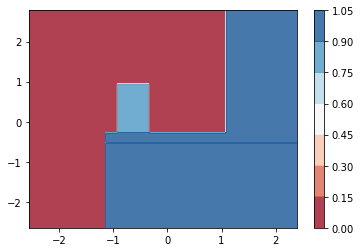

In [147]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

The decision tree method sets less classification groups. Since the decision tree creates decision rules inferred from data features, the classifier would take the red points and blue points and create a decision tree on what makes a red point red or a blue one blue. SInce we had only red and blue points it makes sense that it would see such few classifications. 

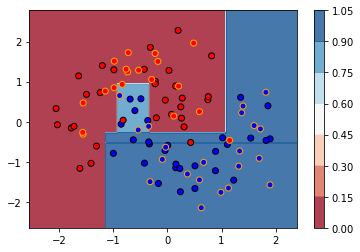

In [148]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

This is a fairly accurate model. We still see the outlier red point being classified as blue. However, the rest of the point were classified correctly. There was some blue points that ended up being classified in the light blue section,however there really isn't any mixing of the two colored points in this area. 

## Notes on clustering vs. classification

Note that clustering is similar, but we don't have the y data, i.e. red/blue or any type of class assignemnt in the data itself, just locations in some variable space (could be lat/lon, or could be something way more abstract, like frequency vs. intensity space for sound data).

Here is a clustering example, similar to what we did above:
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py